In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(29, 8)

In [4]:
import matplotlib.pyplot as plt

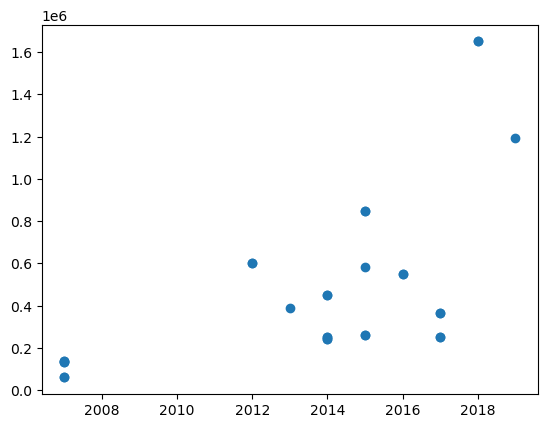

In [5]:
plt.scatter(df['year'],df['selling_price'])

CLUSTERING

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=[]                #WITHIN CLUSTER SUM OF SQUARES                 
for i in range (1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(df[['year','selling_price']])
    wcss.append(km.inertia_)

C:\Users\arghy\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arghy\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\arghy\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\arghy\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (19). Possibly due to duplica

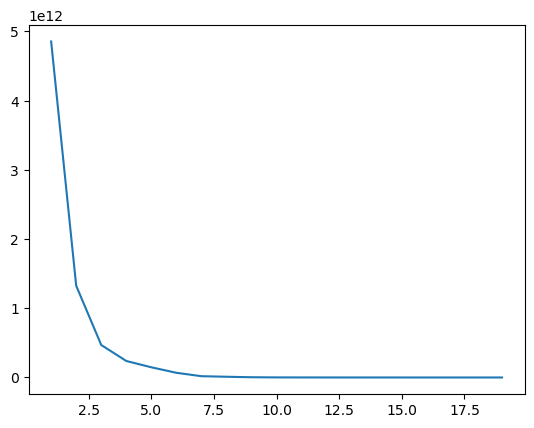

In [8]:
plt.plot(range(1,20),wcss)          #ELBOW CURVE & HERE NO. OF CLUSTER LIES BETWEEN 5.0 TO 7.5

In [9]:
x=df.iloc[:,:].values       #TAKING ALL ROWS & COLUMNS
km=KMeans(n_clusters=4)     
y_means=km.fit_predict(df[['year','selling_price']])           #USES FOR TRIMING & RETURNS CLUSTERS VALUE
y_means

array([0, 0, 2, 0, 2, 0, 2, 0, 3, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 3,
       2, 0, 0, 1, 2, 3, 2])

In [10]:
x[y_means==3,1]       #HERE 3 IS ARRAY INDEX & 1 IS COLUMN INDEX

array([2015, 2015, 2019], dtype=object)

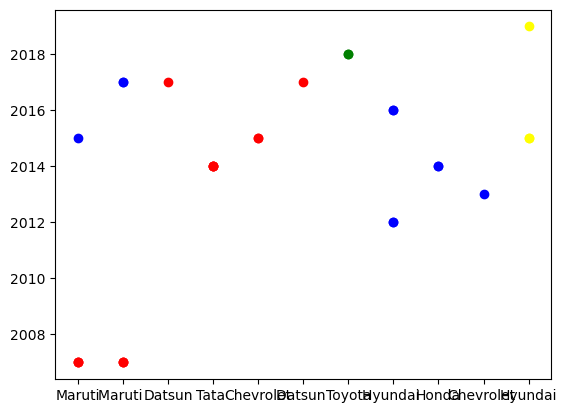

In [11]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], color='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], color='green')
plt.scatter(x[y_means==2,0], x[y_means==2,1], color='blue')
plt.scatter(x[y_means==3,0], x[y_means==3,1], color='yellow')

LINEAR REGRESSION

Text(0, 0.5, 'selling_price')

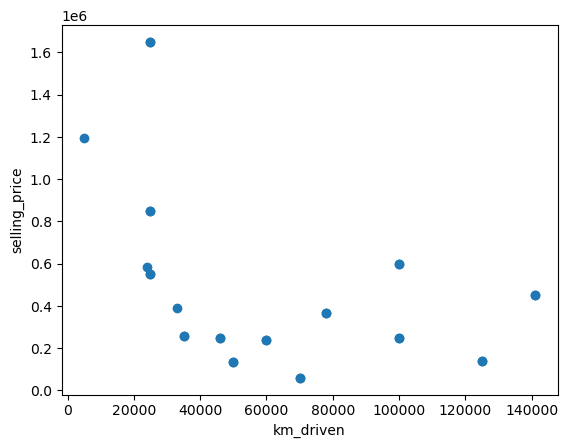

In [12]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')

In [13]:
x=df.iloc[:,3:4]         # TAKING ONLY KM_DRIVEN COLUMN
y=df.iloc[:,-6]          #TARGET COLUMN

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [16]:
l.fit(x_train,y_train)

LinearRegression()

In [17]:
x_test

,km_driven
1,50000
0,70000
14,50000
9,78000
20,60000
24,100000


In [18]:
y_test

1     135000
0      60000
14    135000
9     365000
20    240000
24    250000
Name: selling_price, dtype: int64

In [19]:
l.predict(x_test.iloc[5].values.reshape(1,1))       #PREDICTED SELLING_PRICE  

C:\Users\arghy\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([364755.56379901])

Text(0, 0.5, 'selling_price')

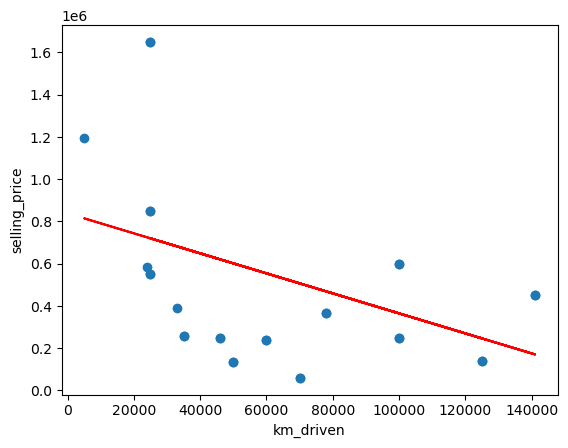

In [20]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.plot(x_train,l.predict(x_train),color='red')
plt.xlabel('km_driven')
plt.ylabel('selling_price')

In [21]:
l.coef_                #COEFFICIENT(SLOPE VALUE)

array([-4.73546505])

In [22]:
l.intercept_           #INTERCEPT VALUE

838302.0686097057

HOW TO GET PREDICTED OUTPUTS

In [23]:
#y=mx+c                                    
#y=(-4.735 * 100000) + 838302.068
#y=364802.068